## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Chang.LAPTOP-KLP71L1N\\Documents\\AIE NLP Practical Course\\Project1 Spam Message Classification\\spam.tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [5]:
#This method checks to see if there are any missing values in the dataset
#If it returns true, that means there is a missing value
#The sum method adds up the count of missing values
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [13]:
df['label'].value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [15]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [18]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [19]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [22]:
ham = ham.sample(spam.shape[0])

In [23]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [27]:
#ignore_index=True because both spam and ham variables hold data that have the same index
data = ham.append(spam, ignore_index=True)

C:\Users\Chang.LAPTOP-KLP71L1N\AppData\Local\Temp\ipykernel_19700\1205479438.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


In [29]:
data.shape

(1494, 4)

In [30]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [31]:
data.head()

,label,message,length,punct
0,ham,How did you find out in a way that didn't incl...,70,1
1,ham,U don't remember that old commercial?,37,2
2,ham,No go. No openings for that room 'til after th...,77,3
3,ham,Ok...,5,3
4,ham,"What's up bruv, hope you had a great break. Do...",73,4


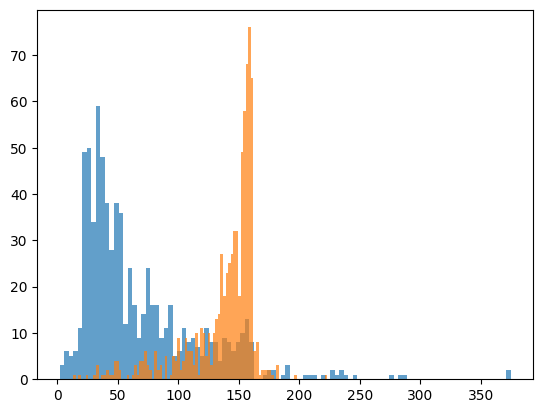

In [32]:
#what does bin do?
#what does alpha do?
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

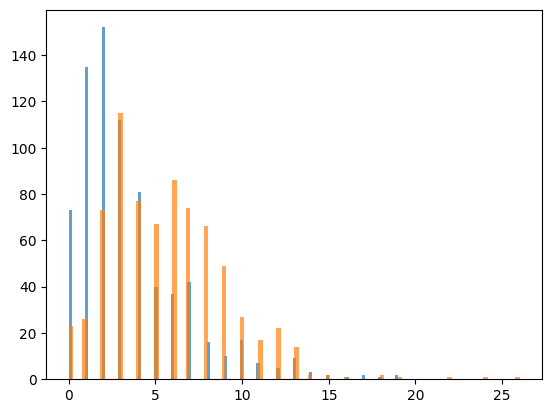

In [33]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)

In [39]:
X_train.shape

(1045,)

In [38]:
X_test.shape

(449,)

## Building Random Forest Model

In [41]:
#term frequency inverse document frequency 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [42]:
#what does n_estimators do?
classifier = Pipeline([('tfidf', TfidfVectorizer()) , ('classifier', RandomForestClassifier(n_estimators=100))])

In [43]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

## Evaluating Model

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',

In [46]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [47]:
accuracy_score(y_test, y_pred)

0.9354120267260579

In [48]:
0.9354120267260579 * 449

420.0

In [49]:
confusion_matrix(y_test, y_pred)

array([[225,   2],
       [ 27, 195]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       227
        spam       0.99      0.88      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.93      0.94       449
weighted avg       0.94      0.94      0.94       449



## Building SVM Model

In [51]:
from sklearn.svm import SVC

In [53]:
#What does C do?
#What does gamma do?
svm = Pipeline([('tfidf', TfidfVectorizer()) , ('classifier', SVC(C = 100, gamma='auto'))])

In [54]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

## Evaluating SVM Model

In [55]:
y_pred = svm.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.9443207126948775

In [57]:
confusion_matrix(y_test, y_pred)

array([[222,   5],
       [ 20, 202]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       227
        spam       0.98      0.91      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



## Further Model Testing (Random Forest & SVM)

In [59]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [60]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [61]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
